**Chapter 07**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sms
%matplotlib inline

# 6

In [2]:
wage_file_name = '../data/Wage.csv'
wages = pd.read_csv(wage_file_name, index_col=0)
wages.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


## 6(a)

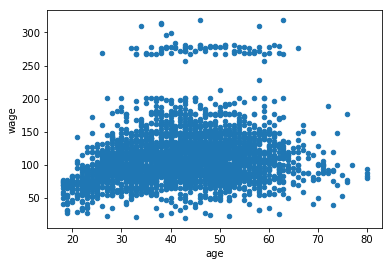

In [6]:
wages.plot.scatter(x='age',y='wage')
plt.show()

In [13]:
wages['age_2'] = wages['age']**2
wages['age_3'] = wages['age']**3
wages['age_4'] = wages['age']**4
wages['age_5'] = wages['age']**5
wages['age_6'] = wages['age']**6
wages['age_7'] = wages['age']**7
wages['age_8'] = wages['age']**8
wages['age_9'] = wages['age']**9

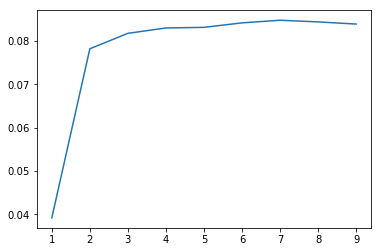

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
def validation(degree_expression):
    '''
    degress_expression is like ['age','age2','age3']
    '''
    X = wages[degree_expression].values
    y = wages['wage'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr.score(X_test,y_test)
    #residual = lr.predict(X_test) - y_test
    #return np.sum(residual*residual)/residual.shape[0]
    #clf = LinearRegression()
    #return cross_val_score(clf, X, y, cv=2)
expressions = [['age'],['age','age_2'],['age','age_2','age_3'],
               ['age','age_2','age_3','age_4'],['age','age_2','age_3','age_4','age_5'],
               ['age','age_2','age_3','age_4','age_5','age_6'],
              ['age','age_2','age_3','age_4','age_5','age_6','age_7'],
              ['age','age_2','age_3','age_4','age_5','age_6','age_7','age_8'],
              ['age','age_2','age_3','age_4','age_5','age_6','age_7','age_8','age_9']]
mses = []
for expression in expressions:
    mses.append(validation(expression))
degrees = range(1,10,1)
plt.plot(degrees, mses)
plt.show()

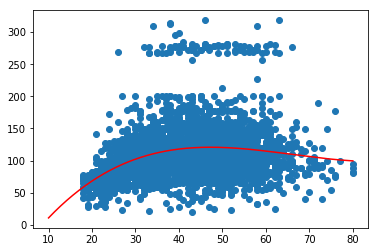

In [30]:
X = wages[['age','age_2','age_3']].values
y = wages['wage'].values
lr = LinearRegression()
lr.fit(X,y)
coef = lr.coef_
inter = lr.intercept_
x = np.linspace(10,80,200)
y = coef[0] * x**1 + coef[1] * x**2 + coef[2] * x**3 + inter
plt.scatter(wages['age'].values, wages['wage'].values)
plt.plot(x,y,c='r')
plt.show()

## 6(b)

/Users/gaufung/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


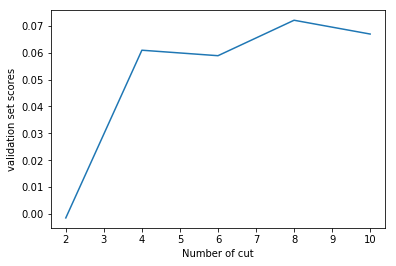

In [47]:
def stepwise(steps):
    '''
    the step point
    '''
    steps = [-np.inf] + steps + [np.inf]
    y = wages['wage'].values
    x = wages['age'].values
    df = wages[['age']]
    indexes = []
    for i in range(len(steps)-1):
        index = 'x'+str(i)
        df[index] = [1 if steps[i] <= item < steps[i+1] else 0 for item in x]
        indexes.append(index)
    X = df[indexes]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    del df
    return lr.score(X_test,y_test)
cuts = [2,4,6,8,10]
steps = []
for cut in cuts:
    steps.append(np.linspace(0,90,cut).tolist())
scores = []
for step in steps:
    scores.append(stepwise(step))
plt.plot(cuts, scores)
plt.xlabel('Number of cut')
plt.ylabel('validation set scores')
plt.show()

When number of cut is 8, it has highest validation scores.

# 7

In [53]:
wages['maritl'].unique()

array(['1. Never Married', '2. Married', '4. Divorced', '3. Widowed',
       '5. Separated'], dtype=object)

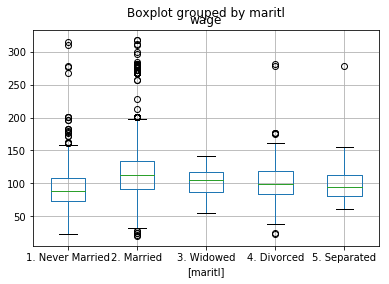

In [59]:
wages[['wage','maritl']].boxplot(by='maritl')

In [60]:
wages['jobclass'].unique()

array(['1. Industrial', '2. Information'], dtype=object)

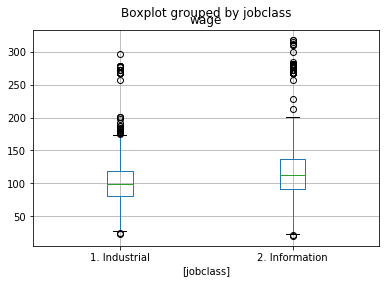

In [61]:
wages[['wage','jobclass']].boxplot(by='jobclass')

# 8

In [65]:
auto_file_name = '../data/Auto'
autos = pd.read_table(auto_file_name, sep='\s+', na_values='?')
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [66]:
autos = autos.dropna()
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


/Users/gaufung/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


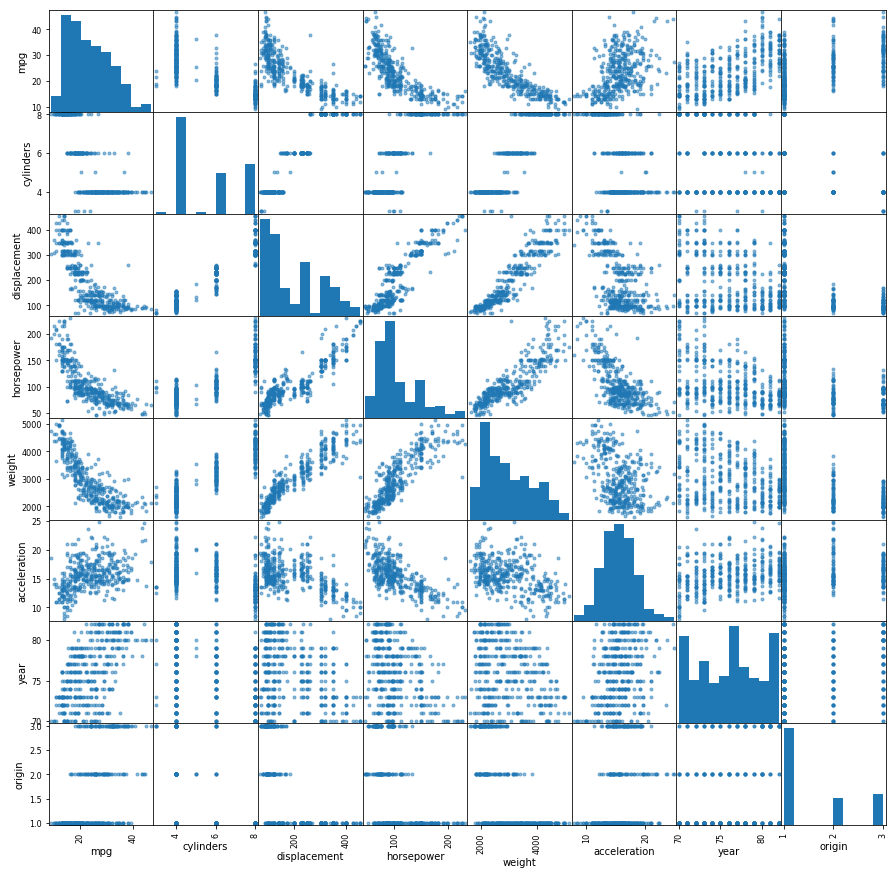

In [73]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(autos,ax=ax);

mpg appears proportional to displcement, horsepower,weigth and acceleration

# 9

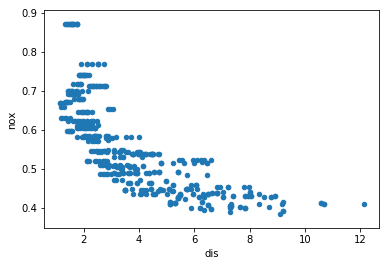

In [77]:
boston_file_name = '../data/Boston.csv'
bostons = pd.read_csv(boston_file_name, index_col=0)
bostons.plot.scatter(x='dis', y='nox');

## 9(a)

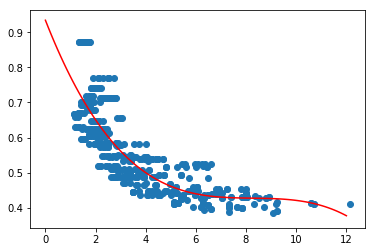

In [85]:
bostons['dis_2'] = bostons['dis']**2
bostons['dis_3'] = bostons['dis']**3
X = bostons[['dis','dis_2','dis_3']].values
y = bostons['nox'].values
lr = LinearRegression()
lr.fit(X, y)
x = np.linspace(0,12,100)
x = np.vstack((x,x**2,x**3)).T
pred_y = lr.predict(x)
plt.scatter(bostons['dis'].values, y)
plt.plot(np.linspace(0,12,100), pred_y, c='r')
plt.show()

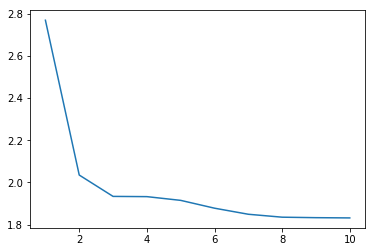

In [86]:
def degree_fit(degree):
    x = bostons['dis'].values
    y = bostons['nox'].values
    stacks = [x]
    for i in range(2,degree+1):
        stacks.append(x**i)
    X = np.vstack(stacks).T
    lr = LinearRegression()
    lr.fit(X, y)
    residual = lr.predict(X) - y
    return np.sum(residual * residual)
degrees = range(1,11)
residuals = []
for degree in degrees:
    residuals.append(degree_fit(degree))
plt.plot(degrees, residuals)
plt.show()

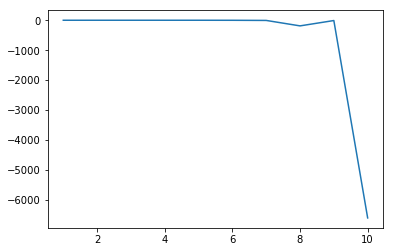

In [95]:
def valid_degree(degree):
    x = bostons['dis'].values
    y = bostons['nox'].values
    stacks = [x]
    for i in range(2,degree+1):
        stacks.append(x**i)
    X = np.vstack(stacks).T
    from sklearn.model_selection import cross_val_score
    lr = LinearRegression()
    scores = cross_val_score(lr, X, y, cv=5)
    return scores.mean()
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    #lr = LinearRegression()
    #lr.fit(X_train, y_train)
    #return lr.score(X_test, y_test)
    #residual = lr.predict(X_test) - y_test
    #return np.sum(residual*residual)
degrees = range(1,11)
scores = []
for degree in degrees:
    scores.append(valid_degree(degree))
plt.plot(degrees, scores)
plt.show()